# **Medición de la polarización política en Colombia**

El siguiente es el código utilizado en el ejercicio de medición de la polarización política en Colombia para luego realizar la proyección de posibles escenarios político-electorales. Este es un ejercicio académico que toma datos públicos del programa *Congreso Visible* de la Universidad de los Andes.

Se describirá el paso a paso de los cálculos para mayor comprensión del ejercicio y del [artículo publicado](https://www.linkedin.com/pulse/c%25C3%25B3mo-medir-la-polarizaci%25C3%25B3n-pol%25C3%25ADtica-y-para-qu%25C3%25A9-grajales-bedoya-ezrne/).

In [ ]:
#Importación de librerías: Pandas, Numpy y Matplotlib
#El uso de estas librerías facilitan los cálculos matemáticos y el modelado.
#Sklear.linear_model nos permitirá utilizar un modelo de regresión para encontrar la relación
#entre las variables que nos interesan: Tendencia política y Éxito electoral

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression


#Pre-procesamiento

# Cargar archivo
data = pd.read_csv("Polaridad_ordenado.csv", delimiter= ";")
print(data.head())

    Año              Partido  Tendencia  Curules
0  2022          Conservador         74       43
1  2022   Centro Democratico         70       29
2  2022      Partido de la U         69       26
3  2022              Liberal         67       46
4  2022  Liga Anticorrupcion         65        4


Graficar la relación entre tendecia política y éxito electoral para encontrar la ecuación de correlación:

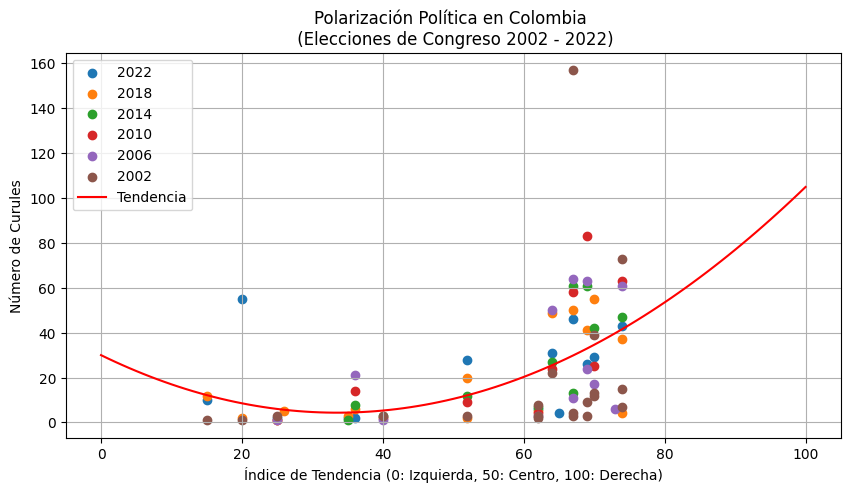

In [ ]:
# Procesamiento

# Graficar la dispersión de la polarización y la línea de tendencia
# Primero, separar los datos por año para trazar la línea:
years = data['Año'].unique()

# Crear una gráfica de 10 pulgadas de ancho y 5 pulgadas de alto.
plt.figure(figsize=(10, 5))

#Iniciar un bucle para que sume los resultados de los años electorales
#Para nuestro dataframe: 2002 a 2022

for year in years:
    yearly_data = data[data['Año'] == year]
    plt.scatter(yearly_data['Tendencia'], yearly_data['Curules'], label=year)

# Cálculo y visualización de la línea de tendencia:
all_tendencia = data['Tendencia']
all_curules = data['Curules']

# Ajuste de una curva polinómica de grado 2 por simplicidad
coefficients = np.polyfit(all_tendencia, all_curules, 2)
polynomial = np.poly1d(coefficients)
# Evaluación de valores de 0 a 100 para generar los puntos de tendencia.
trendline = polynomial(np.arange(0, 101))

# Trazo de la línea de tendencia
plt.plot(np.arange(0, 101), trendline, color='red', linestyle='-', label='Tendencia')

# Etiquetas y títulos
plt.xlabel('Índice de Tendencia (0: Izquierda, 50: Centro, 100: Derecha)')
plt.ylabel('Número de Curules')
plt.title(f'Polarización Política en Colombia \n (Elecciones de Congreso 2002 - 2022)')
plt.legend()
plt.grid(True)
plt.show()

Como necesitamos el índice de correlación, vamos a utilizar los datos ya cargados para que Python haga los cálculos por nosotros:

In [ ]:
# Calcular la correlación entre el índice de tendencia y el número de curules
correlation = data['Tendencia'].corr(data['Curules'])

# Mostrar el resultado
correlation

0.43228259938861274

Una vez identificado el índice de relación, vamos a averiguar el comportamiento por quintiles. Como estamos midiendo la polartización de 0 a 100 donde cero (0) es la extrema izquierda y cien (100) es la extrema derecha, necesitamos saber cómo se mueven los datos cuando los resultados electorales se mueven por todo el espectro político:

In [ ]:
# Añadir una columna de quintiles al dataframe
data['Quintil'] = pd.qcut(data['Tendencia'], 5, labels=[1, 2, 3, 4, 5])

# Calcular la correlación entre el índice de tendencia y el número de curules dentro de cada quintil
quintile_correlations = data.groupby('Quintil').apply(lambda x: x['Tendencia'].corr(x['Curules']))

# Mostrar los resultados
quintile_correlations

Quintil
1   -0.108675
2    0.053928
3    0.203402
4   -0.223390
5    0.399542
dtype: float64

En el [artículo publicado](https://www.linkedin.com/pulse/c%25C3%25B3mo-medir-la-polarizaci%25C3%25B3n-pol%25C3%25ADtica-y-para-qu%25C3%25A9-grajales-bedoya-ezrne/) explico qué significa cada uno de esos valores y cómo se comportan los partidos según los resultados electorales desde la izquierda (quintil 1), los de centro y centroderecha (quintil 2 al 4) y los de derecha (quintil 5). Para este caso es suficiente ver su comportamiento mediante una gráfica 📊:  

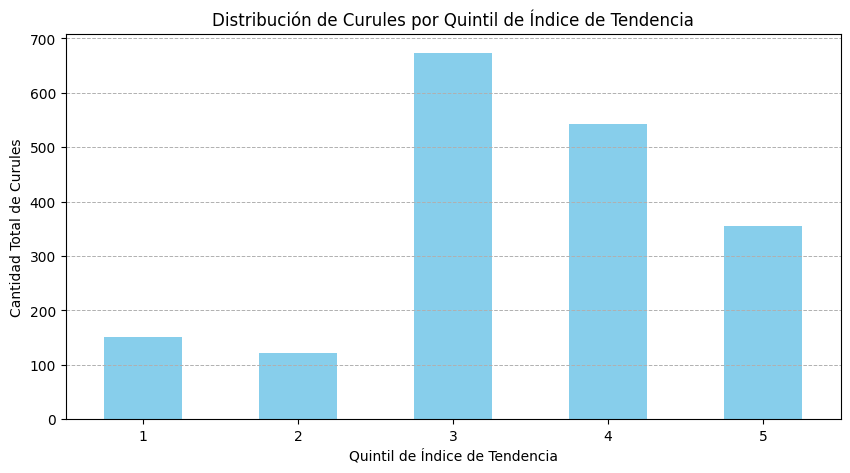

(1844,
 Quintil
 1     8.188720
 2     6.561822
 3    36.550976
 4    29.392625
 5    19.305857
 Name: Curules, dtype: float64)

In [ ]:
# Calcular la cantidad total de curules en cada quintil
# Desde la izquierda hasta la derecha pasando por el centro del espectro político:
total_curules = data['Curules'].sum()
curules_por_quintil = data.groupby('Quintil')['Curules'].sum()

# Calcular el porcentaje de curules en cada quintil
porcentaje_curules_por_quintil = (curules_por_quintil / total_curules) * 100

# Crear un gráfico de barras
plt.figure(figsize=(10, 5))
curules_por_quintil.plot(kind='bar', color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Quintil de Índice de Tendencia')
plt.ylabel('Cantidad Total de Curules')
plt.title('Distribución de Curules por Quintil de Índice de Tendencia')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Mostrar el resultado
plt.show()
total_curules, porcentaje_curules_por_quintil

Ya hemos realizado una primera evaluación de la correlación entre el índice de tendencia y el número de curules a nivel global (**0.43**). Para proporcionar un análisis más detallado del comportamiento electoral, se realizó la correlación dentro de cada quintil:
*   Primer quintil: **-0.11**
*   Segundo quintil: **0.05**
*   Tercer quintil: **0.20**
*   Cuarto quintil: **-0.22**
*   Quinto quintil: **0.40**

Ahora, para realizar una proyección de posibles cambios en la representación política en función de cambios en las tendencias o en el comportamiento electoral, vamos a encontrar la ecuación de correlación utilizando el modelo de regresión lineal:








In [ ]:
# Preparar los datos para el modelo de regresión que nos interesa:
# Tendencia política y Éxito electoral = Curules
X = data[['Tendencia']]
y = data['Curules']

# Crear y ajustar el modelo de regresión lineal
model = LinearRegression() # <--- Python hace todo por nosotros :)
model.fit(X, y)

# Calcular los coeficientes del modelo:
coeficiente = model.coef_[0]
intercepto = model.intercept_

# Mostrar los coeficientes del modelo:
coeficiente, intercepto

(0.6262284517480262, -11.862681918264311)

Armamos nuestra ecuación:
*Curules* = 0.63 x *Tendencia* - 11.86

Y comenzamos a modelar la proyección de escenarios...

Para este caso he planteado 4 escenarios que considero plausibles según la TER y el contexto actual social y político en nuestro país:
1.	👨🏾‍💼➡️: El agente, decide marcarse un poco a la derecha dada las altas tasas de impopularidad del gobierno actual.
2.	⬅️👨🏾‍💼: El agente, siendo simpatizante del gobierno actual decide ser más radical en su posición política de izquierda.
3.	➡️👨🏾‍💼⬅️: El agente, siendo consciente que está en una posición de extremos (derecha o izquierda) decide moderar su discurso.
4.	⬅️👨🏾‍💼➡️: El agente, estando en una posición moderada, decide radicalizar su discurso hacia el extremo (izquierda o derecha).


In [ ]:
# Definición de escenarios
coeficiente = 0.63
intercepto = -11.86

escenarios = {
    'Si me muevo a la derecha': data['Tendencia'] + 5, # Si la campaña se mueve un poco a la derecha👨🏾‍💼➡️
    'Si nos movemos a la izquierda': data['Tendencia'] - 5, # Si la campaña se mueve un poco a la izquierda ⬅️👨🏾‍💼
    'Si moderamos el discurso': data['Tendencia'].apply(lambda x: 50 if x < 25 or x > 75 else x), # Si los extremos se moderan hacia el centro ➡️👨🏾‍💼⬅️
    'Si me radicalizo!': data['Tendencia'].apply(lambda x: 0 if x < 25 else (100 if x > 75 else x)) # Si las tendencias políticas se polarizan ⬅️👨🏾‍💼➡️
}

#"Lambda" es una función anónima en Python que nos permite de manera rápida manejar los rangos de extremo a extremo (0 a 100),
# pero también se podría usar de manera formal con 'def'.

# Usando la ecuación de regresión lineal calculamos la cantidad de curules:
proyecciones = {}
for escenario, tendencias in escenarios.items():
    proyecciones[escenario] = coeficiente * tendencias + intercepto

# Suma total de curules proyectadas para cada escenario:
curules_proyectadas = {escenario: sum(proyeccion) for escenario, proyeccion in proyecciones.items()}

# Mostrar los resultados:
print(curules_proyectadas)


{'Si me muevo a la derecha': 2116.2599999999993, 'Si nos movemos a la izquierda': 1605.96, 'Si moderamos el discurso': 1983.9600000000003, 'Si me radicalizo!': 1794.9600000000003}


Finalmente, podemos hacer las interpretaciones según los números. En el [artículo publicado](https://www.linkedin.com/pulse/c%25C3%25B3mo-medir-la-polarizaci%25C3%25B3n-pol%25C3%25ADtica-y-para-qu%25C3%25A9-grajales-bedoya-ezrne/) está más ampliamente explicado cada punto, pero básicamente lo que indican los números es:

1. El escenario 1 sugiere que un desplazamiento uniforme hacia la derecha podría aumentar significativamente la representación política, o sea, la cantidad de curules en el Congreso.🤔

2. Un desplazamiento uniforme hacia la izquierda en el escenario 2 resultaría en una disminución considerable en la representación política.❎

3. En el escenario 3 los partidos más extremos que se mueven hacia el centro resultan en una representación total moderada. Es decir, es conveniente la moderación del discurso y el relato en este momento.✌

4. Aumentar la polarización hacia los extremos muestra una representación intermedia, menos que en el escenario de desplazamiento hacia el centro, pero más que el decremento uniforme hacia la izquierda. Es decir, radicalizarse puede hacer perder votos.⚡

Estas proyecciones pueden ayudar a anticipar posibles futuros escenarios que permitan diseñar estrategias que maximicen la representación y el impacto de los partidos políticos o campañas electorales. Sin embargo, es importante recordar que los modelos son simplificaciones de la realidad y que factores impredecibles pueden influir en los resultados finales.